

<h1 align="center"> Fashion MNIST Classification </h1>
<h2 align="center"> Project #2 </h2>


---



---


# **Name:**  Sandra Girgis
# **ID:** 20399121

# Problem Statement

☘️ There are estimated to be nearly half a million species of plant in the world. Classification of species has been historically problematic and often results in duplicate identifications.

</br>
</br>

☘️ The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.


</br>
</br>
</br>

<p align = "center"> So let's work on the data that we have to see what this problem leads us to do....😃</p>

# **Part I: Data Preparation**

## I.I Data Overview

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

![](https://res.cloudinary.com/practicaldev/image/fetch/s--tGTLvoST--/c_imagga_scale,f_auto,fl_progressive,h_720,q_auto,w_1280/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

### I.I.I Importing the most important dependences

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from keras.models import Sequential
from keras import regularizers
import numpy as np
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from matplotlib import*
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

### I.I.II Loading Dataset

In [2]:
# train_data = pd.read_csv('fashion-mnist_train.csv')
# X_train = train_data.iloc[:, 1:]
# y_train = train_data.iloc[:, 0]
# test_data = pd.read_csv('fashion-mnist_test.csv')
# X_test = test_data.copy()

In [121]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### I.I.II Visualizing Data

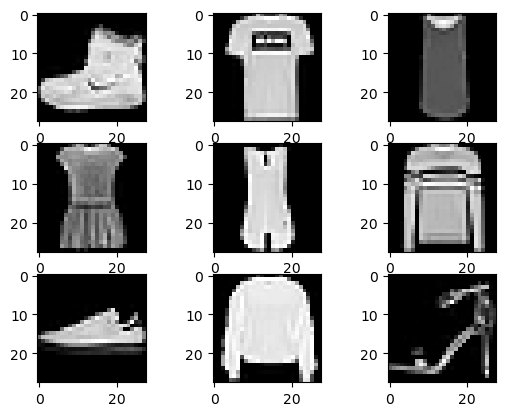

In [4]:
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

C:\Users\BadCats\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


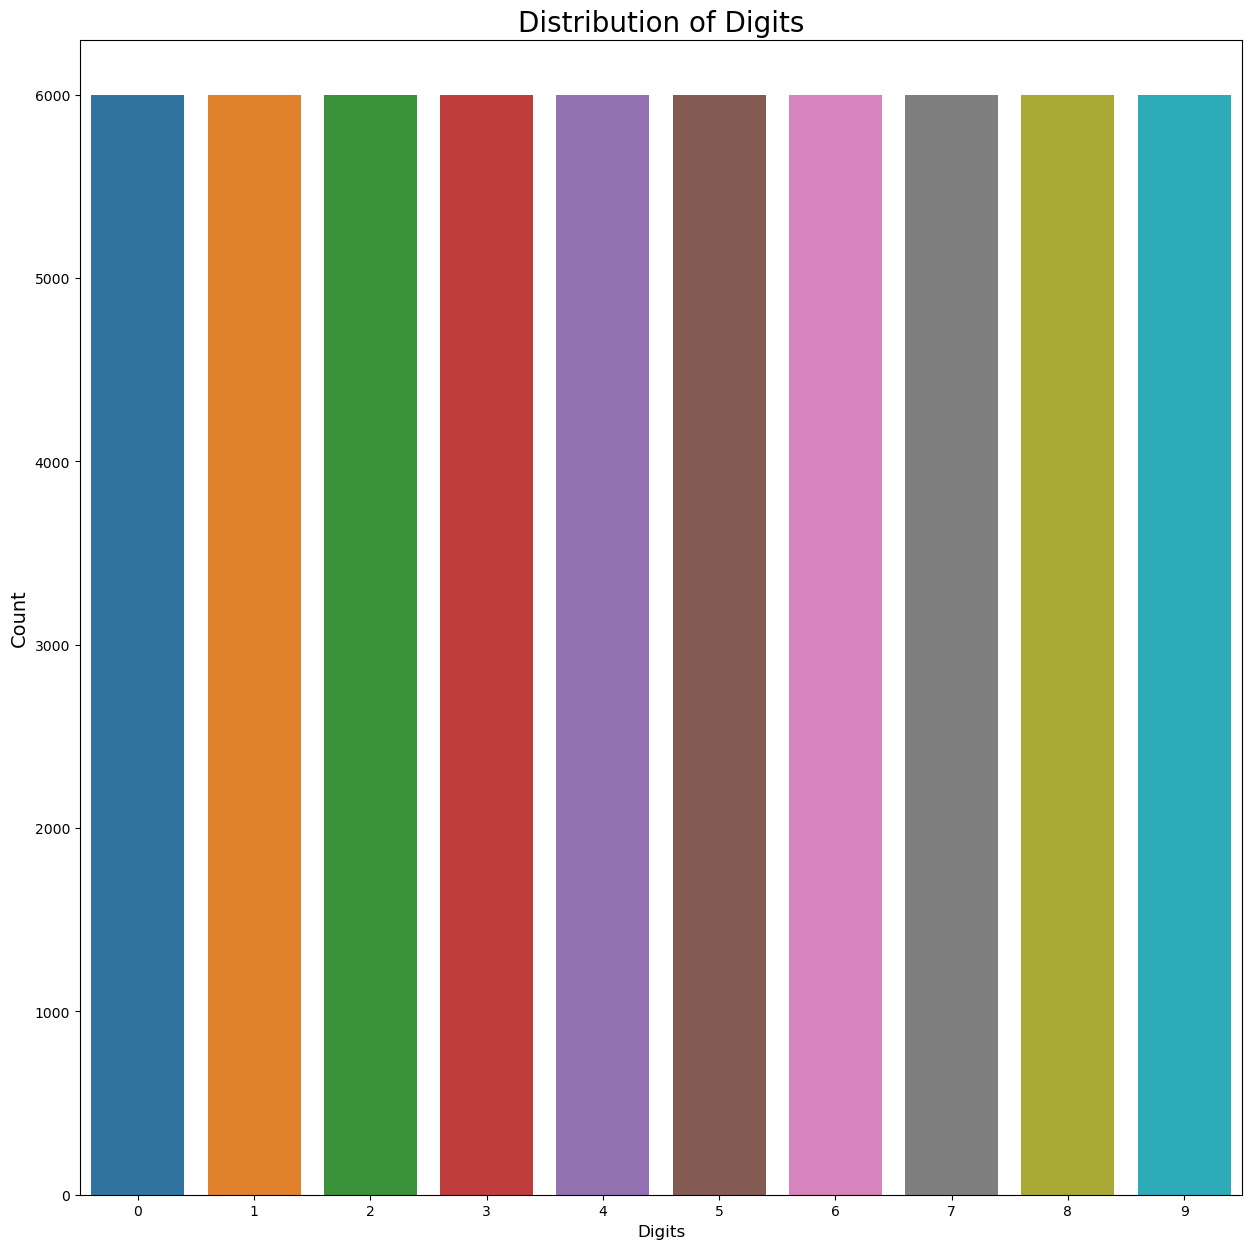

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(y_train)
ax.set_title('Distribution of Digits', fontsize=20)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

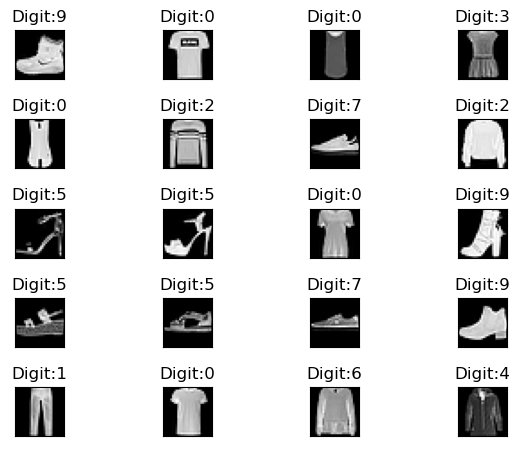

In [6]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

plot_digits(X_train, y_train)

### I.I.II Reshape Dataset

In [96]:
# #Reshape dataset
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


# expand new axis, channel axis 
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [31]:
X_train = np.repeat(X_train, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

### I.I.II Encoding Dataset

In [123]:
# one hot encode target values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### I.I.II Normalize Dataset

In [122]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1  
X_train /= 255.0
X_test /= 255.0

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=2019)

### I.I.II Define LeNet-5 Model

In [90]:
from keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Visualize the Model

In [91]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_11 (Dense)            (None, 256)               3

In [92]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [101]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [102]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_train)

In [103]:
history = model.fit(X_train, y_train, batch_size=100, steps_per_epoch=len(X_train)/100, 
                    epochs=15, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/15
480/480 [==============================] - 12s 25ms/step - loss: 0.2235 - accuracy: 0.9186 - val_loss: 0.2526 - val_accuracy: 0.9077 - lr: 5.0000e-04
Epoch 2/15
480/480 [==============================] - 13s 27ms/step - loss: 0.2079 - accuracy: 0.9227 - val_loss: 0.2537 - val_accuracy: 0.9072 - lr: 5.0000e-04
Epoch 3/15
480/480 [==============================] - 13s 27ms/step - loss: 0.1924 - accuracy: 0.9294 - val_loss: 0.2451 - val_accuracy: 0.9141 - lr: 5.0000e-04
Epoch 4/15
480/480 [==============================] - 13s 27ms/step - loss: 0.1796 - accuracy: 0.9343 - val_loss: 0.2352 - val_accuracy: 0.9165 - lr: 5.0000e-04
Epoch 5/15
480/480 [==============================] - 13s 27ms/step - loss: 0.1657 - accuracy: 0.9386 - val_loss: 0.2495 - val_accuracy: 0.9132 - lr: 5.0000e-04
Epoch 6/15
480/480 [==============================] - 13s 27ms/step - loss: 0.1510 - accuracy: 0.9447 - val_loss: 0.2414 - val_accuracy: 0.9160 - lr: 5.0000e-04
Epoch 7/15
479/480 [==============

In [104]:
score_val = model.evaluate(X_val, y_val, batch_size=32)

375/375 [==============================] - 1s 3ms/step - loss: 0.2581 - accuracy: 0.9231


In [105]:
print('Test loss:', score_val[0]) 
print('Test accuracy:', score_val[1])

Test loss: 0.25805309414863586
Test accuracy: 0.9230833053588867


In [106]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [107]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_val,axis = 1)

In [108]:
y_pred[:5]

array([9, 2, 1, 1, 6], dtype=int64)

In [109]:
y_test[:5]

array([2, 5, 8, 6, 6], dtype=int64)

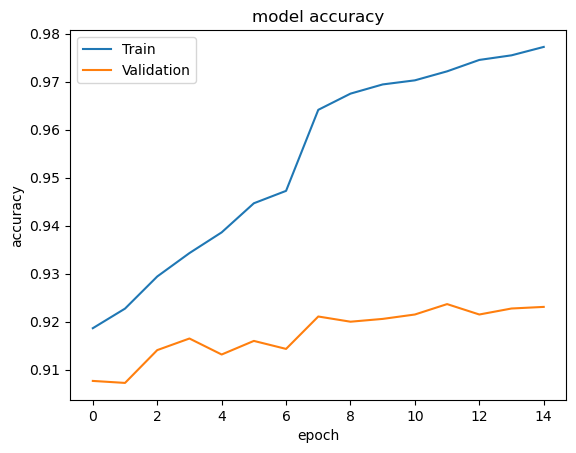

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

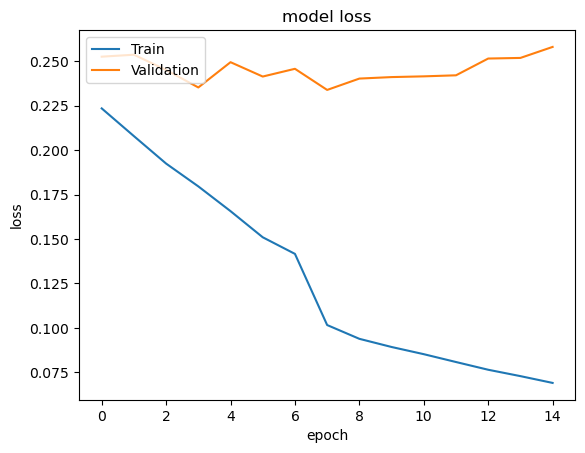

In [111]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### ⚫ **OBSERVATION**

♦ If we use LeNet-5 model with:

 👉🏻 Adam optimizer

 👉🏻 loss = categorical_crossentropy
 
 👉learning_rate=5e-4
 
 👉 epochs=15
    
 * That will lead to The Test Accuracy and loss will be: 
 
👉Test loss: 0.286965936422348

👉Test accuracy: 0.9229166507720947

# Hyper-paremeter Fine-Tunning
### Using RMSprop

In [112]:
# initiate RMSprop optimizer
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [113]:
history = model.fit(X_train, y_train, batch_size=100, steps_per_epoch=len(X_train)/100, 
                    epochs=15, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/15
480/480 [==============================] - 12s 25ms/step - loss: 0.0660 - accuracy: 0.9770 - val_loss: 0.2619 - val_accuracy: 0.9224 - lr: 1.0000e-04
Epoch 2/15
480/480 [==============================] - 13s 27ms/step - loss: 0.0624 - accuracy: 0.9793 - val_loss: 0.2646 - val_accuracy: 0.9223 - lr: 1.0000e-04
Epoch 3/15
480/480 [==============================] - 13s 27ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.2681 - val_accuracy: 0.9233 - lr: 1.0000e-04
Epoch 4/15
480/480 [==============================] - 13s 28ms/step - loss: 0.0571 - accuracy: 0.9811 - val_loss: 0.2750 - val_accuracy: 0.9212 - lr: 1.0000e-04
Epoch 5/15
480/480 [==============================] - 13s 27ms/step - loss: 0.0538 - accuracy: 0.9822 - val_loss: 0.2860 - val_accuracy: 0.9198 - lr: 1.0000e-04
Epoch 6/15
479/480 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9833
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
480/480 [=============

In [114]:
score_val = model.evaluate(X_val, y_val, batch_size=32)
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])

375/375 [==============================] - 1s 3ms/step - loss: 0.2870 - accuracy: 0.9229
Test loss: 0.286965936422348
Test accuracy: 0.9229166507720947


In [115]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [116]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_val,axis = 1)

In [117]:
y_pred[:5]

array([9, 2, 1, 1, 6], dtype=int64)

In [118]:
y_test[:5]

array([2, 5, 8, 6, 6], dtype=int64)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


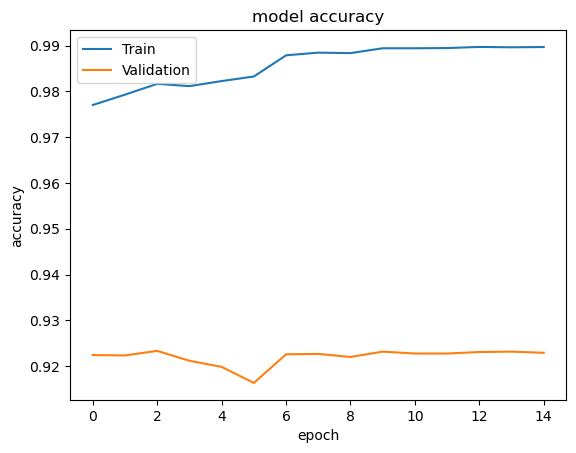

In [119]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


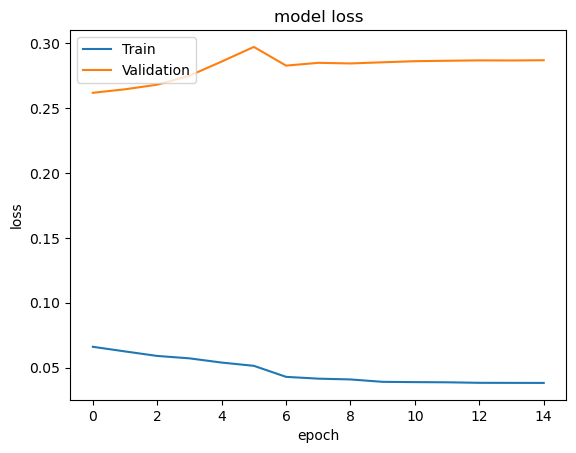

In [120]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### ⚫ **OBSERVATION**

♦ If we Tunning the Hyper-parameter in LeNet-5 model Using:

 👉🏻 RMSprop optimizer

 👉🏻 loss = categorical_crossentropy
 
 👉learning_rate=0.0001
 
 👉 epochs=15
    
 * That will lead to The Test Accuracy and loss will be: 
 
👉Test loss: 0.286965936422348

👉Test accuracy: 0.9229166507720947

# Using K-fold

In [139]:
from keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [140]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_14 (Dense)            (None, 256)              

In [141]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [143]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-9)

In [144]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

acc_histories = []
loss_histories = []

for train_index, val_index in kfold.split(X_train):
    # For each split, train the model and store the history
    X_train2, X_val = X_train[train_index], X_train[val_index]
    y_train2, y_val = y_train[train_index], y_train[val_index]

    history = model.fit(X_train2, y_train2, epochs=15, batch_size=100, validation_data=(X_val, y_val),
                        steps_per_epoch=len(X_train)/100, callbacks=[reduce_lr]) 

    # Store results 
    acc_histories.append(history.history['val_accuracy']) 
    loss_histories.append(history.history['val_loss'])
    print("Fold #" )

Epoch 1/15
600/600 [==============================] - 14s 24ms/step - loss: 0.0519 - accuracy: 0.9834 - val_loss: 0.0767 - val_accuracy: 0.9733 - lr: 1.0000e-04
Epoch 2/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 0.0592 - val_accuracy: 0.9795 - lr: 1.0000e-04
Epoch 3/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0500 - val_accuracy: 0.9848 - lr: 1.0000e-04
Epoch 4/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0348 - accuracy: 0.9898 - val_loss: 0.0424 - val_accuracy: 0.9884 - lr: 1.0000e-04
Epoch 5/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0301 - accuracy: 0.9916 - val_loss: 0.0351 - val_accuracy: 0.9897 - lr: 1.0000e-04
Epoch 6/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0315 - val_accuracy: 0.9912 - lr: 1.0000e-04
Epoch 7/15
600/600 [==============

Fold #
Epoch 1/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0191 - accuracy: 0.9955 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 2/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0188 - accuracy: 0.9957 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 3/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 4/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 5/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0189 - accuracy: 0.9956 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 6/15
600/600 [==============================] - 16s 26ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0075 - val_accuracy: 0.9995 - lr: 1.0000e-09
Epoch 7/15
600/600 [=======

In [145]:
score_val = model.evaluate(X_val, y_val, batch_size = 32)
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])

375/375 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9998
Test loss: 0.007324558217078447
Test accuracy: 0.999750018119812


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


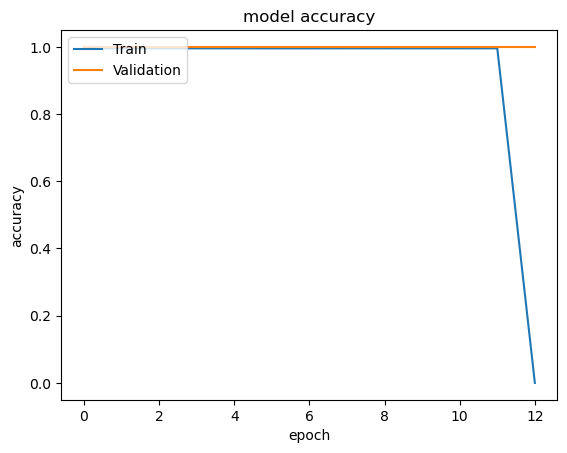

In [146]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

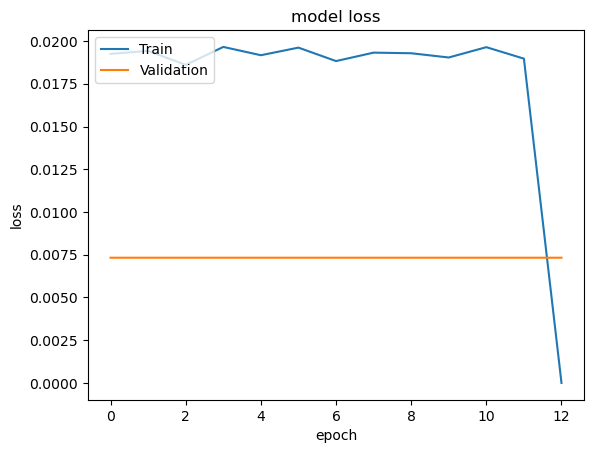

In [147]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### ⚫ **OBSERVATION**

♦ If we use K-Fold validation with k = 5 with:

 👉🏻 Adam optimizer

 👉🏻 loss = categorical_crossentropy
 
 👉learning_rate = 5e-4
 
 👉 epochs=15
    
 * That will lead to The Test Accuracy and loss will be: 
 
👉Test loss: 0.007324558217078447

👉Test accuracy: 0.999750018119812


# VGGNet

VGGNet is an architecture presented by Simonyan and Zisserman in 2014. VGGNet is similar to previous AlexNet, however, it only contains 3x3 convolutional kernels and many more filters. It is widely used for extracting features, not only for image classification but for many other computer vision domains, such as feature representation, style transfer or the image description. You can check the [paper](https://arxiv.org/pdf/1409.1556.pdf) for further details. Next image shows VGG16 architecture ([source](https://www.cs.toronto.edu/~frossard/post/vgg16/)):

![](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)

The training time of the architecture is massive since it has more than 130 million parameters. Thankfully, we can find it already pre-trained in Keras. Keras has the two proposed versions, VGG16 and VGG19, where the difference lies in the number of weight layers within the network.

In [35]:
# resize the input shape , i.e. old shape: 28, new shape: 32
X_train = tf.image.resize(X_train, [32,32]) # if we want to resize 
X_test = tf.image.resize(X_test, [32,32])
X_val = tf.image.resize(X_val, [32,32])

# [optional]: we may need 3 channel (instead of 1)
X_train = np.repeat(X_train, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)
X_val = np.repeat(X_val, 3, axis=-1)

In [76]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten


model = VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer as in VGG16
output = model.output
output = Flatten()(output)
output = Dense(units=4096, activation='relu')(output)
output = Dense(units=4096, activation='relu')(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

In [77]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [78]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [79]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [80]:
history = model.fit(X_train, y_train, batch_size=100, steps_per_epoch=len(X_train)/100, 
                    epochs=15, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/15
480/480 [==============================] - 105s 218ms/step - loss: 0.5103 - accuracy: 0.8168 - val_loss: 0.4073 - val_accuracy: 0.8508 - lr: 5.0000e-04
Epoch 2/15
480/480 [==============================] - 110s 230ms/step - loss: 0.3772 - accuracy: 0.8603 - val_loss: 0.3913 - val_accuracy: 0.8547 - lr: 5.0000e-04
Epoch 3/15
480/480 [==============================] - 110s 228ms/step - loss: 0.3422 - accuracy: 0.8714 - val_loss: 0.3565 - val_accuracy: 0.8671 - lr: 5.0000e-04
Epoch 4/15
480/480 [==============================] - 111s 231ms/step - loss: 0.3187 - accuracy: 0.8807 - val_loss: 0.3597 - val_accuracy: 0.8659 - lr: 5.0000e-04
Epoch 5/15
480/480 [==============================] - 110s 230ms/step - loss: 0.2963 - accuracy: 0.8885 - val_loss: 0.3568 - val_accuracy: 0.8662 - lr: 5.0000e-04
Epoch 6/15
480/480 [==============================] - 110s 229ms/step - loss: 0.2778 - accuracy: 0.8950 - val_loss: 0.3437 - val_accuracy: 0.8775 - lr: 5.0000e-04
Epoch 7/15
480/480 [==

In [82]:
score_val = model.evaluate(X_val, y_val, batch_size=32)
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])

375/375 [==============================] - 18s 49ms/step - loss: 0.3936 - accuracy: 0.8914
Test loss: 0.39361539483070374
Test accuracy: 0.8914166688919067


In [85]:
y_test = model.predict(X_test)

313/313 [==============================] - 16s 51ms/step


In [45]:
y_test = np.argmax(y_test,axis = 1)
y_test[:5]

array([9, 2, 1, 1, 0], dtype=int64)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


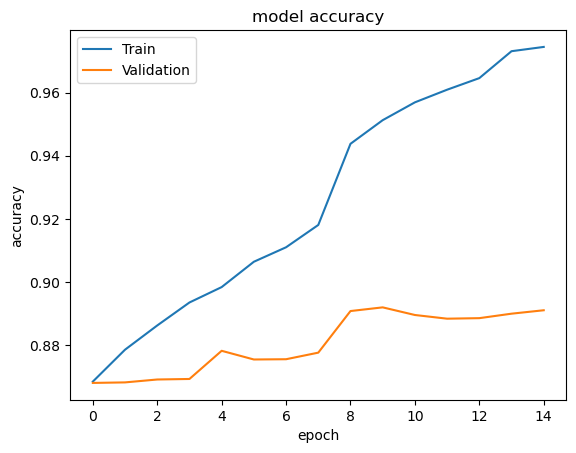

In [46]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

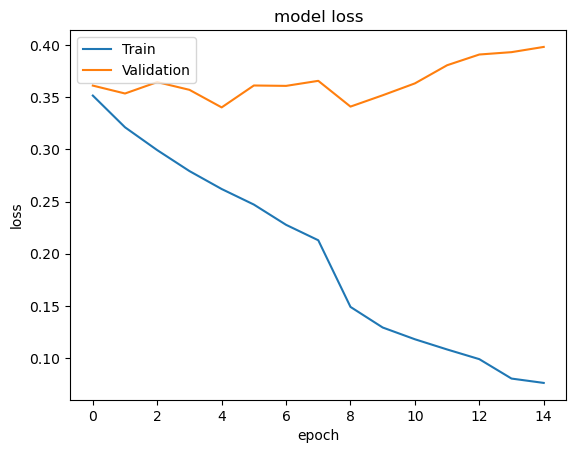

In [56]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### ⚫ **OBSERVATION**

♦ If we use VGG-16 model with:

 👉🏻 Adam optimizer

 👉🏻 loss = categorical_crossentropy
 
 👉learning_rate=5e-4
 
 👉 epochs=15
    
 * That will lead to The Test Accuracy and loss will be: 
 
👉 Test loss: 0.39361539483070374

👉 Test accuracy: 0.8914166688919067
    

## ResNet

In 2015 the winner of the ImageNet challenge was the Residual Neural Network ([ResNet](https://arxiv.org/pdf/1512.03385.pdf)) architecture. Similar to Inception, ResNet is built by micro-architectures modules, called residual blocks. Those blocks introduced skip connections, which allowed to train huge architectures (152 layers) while still having lower complexity than VGGNet. Those residual connections also allowed them to create deeper architectures since the gradient could backpropagate easier through the skip connections. Next image is from [Das' blog](https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5) and shows ResNet architecture with its skip connections:

![texto alternativo](https://cdn-images-1.medium.com/max/800/0*pkrso8DZa0m6IAcJ.png)

Keras offers the implementation of ResNet50 pre-trained on ImageNet. In addition to ResNet50, deeper versions of it, ResNet101 or ResNet152, are widely used nowadays. The main difference lies in the number of layers, e.g., ResNet50 is a 50 layer Residual Network.

In [65]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
import keras.applications.resnet
from keras.applications.resnet import ResNet50

model = ResNet50(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in model.layers[:]:
    layer.trainable = False

# Add Dense layer to classify on CIFAR10
output = model.output
output = GlobalAveragePooling2D()(output)
output = Dense(units=10, activation='softmax')(output)
model = Model(model.input, output)

In [66]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [67]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [68]:
history = model.fit(X_train, y_train, batch_size=100, steps_per_epoch=len(X_train)/100, 
                    epochs=15, validation_data=(X_val, y_val), callbacks=[reduce_lr])

Epoch 1/15
480/480 [==============================] - 53s 107ms/step - loss: 1.5145 - accuracy: 0.5102 - val_loss: 1.1696 - val_accuracy: 0.6240 - lr: 5.0000e-04
Epoch 2/15
480/480 [==============================] - 54s 113ms/step - loss: 1.0486 - accuracy: 0.6656 - val_loss: 0.9694 - val_accuracy: 0.6898 - lr: 5.0000e-04
Epoch 3/15
480/480 [==============================] - 55s 115ms/step - loss: 0.9157 - accuracy: 0.6983 - val_loss: 0.8748 - val_accuracy: 0.7082 - lr: 5.0000e-04
Epoch 4/15
480/480 [==============================] - 55s 116ms/step - loss: 0.8455 - accuracy: 0.7154 - val_loss: 0.8183 - val_accuracy: 0.7320 - lr: 5.0000e-04
Epoch 5/15
480/480 [==============================] - 56s 116ms/step - loss: 0.8023 - accuracy: 0.7243 - val_loss: 0.7883 - val_accuracy: 0.7322 - lr: 5.0000e-04
Epoch 6/15
480/480 [==============================] - 56s 116ms/step - loss: 0.7676 - accuracy: 0.7350 - val_loss: 0.7607 - val_accuracy: 0.7394 - lr: 5.0000e-04
Epoch 7/15
480/480 [========

In [73]:
score = model.evaluate(X_val, y_val, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

375/375 [==============================] - 18s 47ms/step - loss: 0.6539 - accuracy: 0.7732
Test loss: 0.6538869142532349
Test accuracy: 0.7731666564941406


In [81]:
y_test = model.predict(X_test)

313/313 [==============================] - 18s 59ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


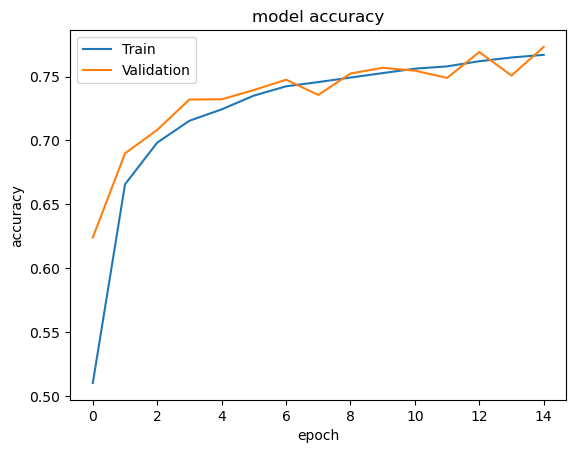

In [74]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

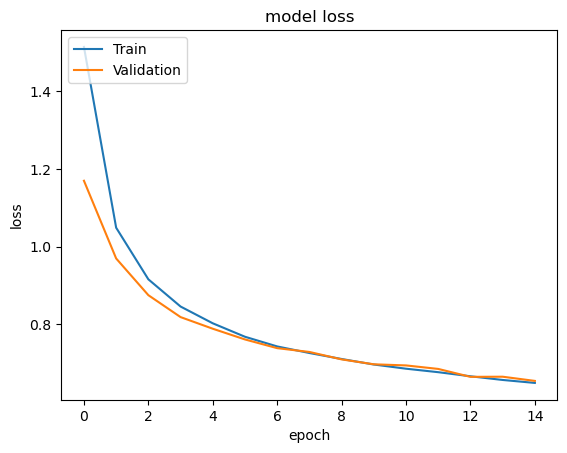

In [75]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

⚫ OBSERVATION
♦ If we use ResNet model with:

👉🏻 Adam optimizer

👉🏻 loss = categorical_crossentropy

👉learning_rate=5e-4

👉 epochs=15

That will lead to The Test Accuracy and loss will be:

👉 Test loss: 0.6538869142532349

👉 Test accuracy: 0.7731666564941406

